##Using mothur- pairwise.seqs

In [172]:
! tail data/otusn.pick.fasta

>OTU.38673
TTACCGAGTGCGGGTCCCCCGGGGCCCAACCTCCCACCCGTGTTGACCGACCCCTGTTGCTTCGGCGGGCCCGCCTGGGCTTTCCGCCTCGGCCGCCGGGGGGCTTAGCCCCCGGGTCCGCGCCCGCCGAAGACCCCCTGAACGCTGCCTTGAAGGTTGCCGTCTGAGTGATAAATCAATCATTAAAACTTTCAACAACGGATCTCTTGGTTCCGGC
>OTU.38679
TTAAAGAGTGTAATAACTCCCAAACCCATGTGAACATACCTCATGTTGCCTCGGCAGGTCGCGCCTCCCTCGTAGGCCCTACCCCGTAGGCTCCTACGCGGAAGGCGCGGGTACCCCTGCCGGTGGCCCACGAAACTCTGTCTCATCGTTGAATTCTGAACCTATAACTAAATAAGTTAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>OTU.38691
TTACCTAGAGTTGTAGGCTTTGCCTGCTATCTCTTACCCATGTCTTTTGAGTACCTTACGTTTCCTCGGTGGGTTCGCCCACCGATTGGACAAATTTAAACCCTTTGCAGTTGAAATCAGCGTCTGAAAAAACTTAATAGTTACAACTTTCAACAACGGATCTCTTGGTTCTGGC
>OTU.38842
TTATTGAATAAATCTGAAGCGGTTGTAGCTGTCTCTCCGGAGAATGTGCACGCCCTTCACCTTTATCTTTCCACCTGTGCACACACTGTAGTCCTGGATACCTCTCGTCGAAAGGCGGATGCAGGGTTTGCTGTGACTTCGCAAGAAGGCCGGCTTACCCTGAATTTCCAGGTCTATGATCTCACACACCCCAAACTGAATGTTACAGAATGTTATCATCAGGCTTCGTGCCTATAAATTTATACAACTTTCAGCAACGGATCTCTTGGCTCTCGC
>OTU.38847
TTACAGAGTTGCAAAACTCCCTAAACCATTGTGAACGTTACCTAAACCGTTGCTTCGGCGGG

In [45]:
! grep -c ">" data/otusn.pick.fasta

1664


In [2]:
! head data/finalQC.fasta

>D3013.24_0
TTCATAATCAAAGTGTTTTTATGGCACTTTTAAAAAAATCCATATCCACCTTGTGTGCAATGTCATCTCACTGGAGGCCAGCTGGCTGTCAAAAGCCCGTTTGGTCACCTTTGGGATTTATATCTACTCAGAACTTTAGTGATTTTGTCTGAAAAATATTATGAATAACTTAATTCAAAATACAACTTTCAACAACGGATCTCTTGGCTCTCGC
>D1412.20_1
TTAACACTAATCCACACACTACTCAACCTAGCCTTTAGTTGCAGCCGAGGTGTTCGCCGTCAGGCAGCGCCGCAGCAGCAACCACAACAAACCTAATCTCAAAGGACTTTAACTAAGCCTTACCACAAAACCAAATTCTCAACGATGGATATCTTGGTTCCCAT
>D1412.18_2
TTACCGAGTTTACACCTCCCAAACCCCTGTGAACATACCTTAATGTTGCCTCGGCGGATCAGCCCGCGCCCCGTAAAACGGGACGGCCCGCCAGAGGACCCAAACTCTAATGTTTCTTATTGTAACTTCTGAGTAAAACAAACAAATAAATCAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>D3012.10_3
TTACAGAGTTGCAAAACTCCCTAAACCATTGTGAACGTTACCTAAACCGTTGCTTCGGCGGGCGGCCCCGGGGTTCTCCCCGGGAGCCCCCGGGCCCCATCCCGGGCGCCCGCCGGAGTTCACCAAACTATTGATAATTTAGGGCCTCTCTGAGTCTTCTGTACCGAATAAGTCAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>D713.15_4
TTACAGAGTTGCAAAACTCCCTAAACCATTGTGAACGTTACCTAAACCGTTGCTTCGGCGGGCGGCCCCGGGGTTTACCCCCCGGGCGCCCCTGGGCCCCACCGCGGGCGCCCGCCGGAGGTCACCAAACTCTTGATAATTTATGGCCTCTCTGAGTCTTCTGTACT

In [3]:
! grep -c ">" data/otusn.pick.fasta

2032


In [90]:
%%bash
mothur "#pairwise.seqs(fasta=data/otusn.pick.fasta, calc=onegap, countends=false, \
processors=10, output=square)" > /dev/null


In [ ]:
%%bash
ionice -c2 -n3 \
mothur "#cluster(column=data/finalQC.unique.dist, name=data/finalQC.names)" 

In [70]:
!tail data/otusn.pick.square.dist | cut -c1-80

OTU.38525 	0.382	0.3652	0.3588	0.375	0.3539	0.4202	0.3876	0.3846	0.3315	0.3815	0
OTU.38542 	0.3267	0.3235	0.3708	0.3122	0.3266	0.4388	0.3107	0.3846	0.3315	0.3242
OTU.38601 	0.3387	0.2356	0.3556	0.2396	0.2461	0.3077	0.2304	0.3387	0.2283	0.2983
OTU.38602 	0.2333	0.244	0.3611	0.2275	0.233	0.3833	0.2212	0.3465	0.2172	0.2932	0
OTU.38623 	0.1836	0.1805	0.3436	0.1731	0.1782	0.4	0.1796	0.3682	0.2362	0.3333	0.
OTU.38673 	0.3349	0.3024	0.3953	0.3175	0.3202	0.3462	0.3382	0.2857	0.367	0.3867	
OTU.38679 	0.2798	0.2778	0.3785	0.2864	0.2817	0.3077	0.2811	0.4009	0.2412	0.3046
OTU.38691 	0.3778	0.4078	0.4111	0.3757	0.3785	0.4096	0.4101	0.388	0.3825	0.3851	
OTU.38842 	0.4378	0.446	0.4035	0.4444	0.4554	0.3892	0.4314	0.4118	0.4241	0.4035	
OTU.38847 	0.1106	0.09184	0.3155	0.07895	0.1066	0.3077	0.05699	0.3692	0.2827	0.3


In [2]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from math import log

In [3]:
%matplotlib inline

In [4]:
dist_lines = open("data/otusn.pick.square.dist").readlines()
def line2array(line):
    line = line.rstrip()
    return np.array(map(float, line.split("\t")[1:]))
distmat = np.vstack([line2array(line) for line in dist_lines[1:]])

In [5]:
def getOTU(line):
    line = line.rstrip()
    return np.array(line.split("\t")[0:1])
OTU= np.vstack(getOTU(line) for line in dist_lines[1:])

In [6]:
print OTU

[['OTU.1     ']
 ['OTU.2     ']
 ['OTU.3     ']
 ..., 
 ['OTU.38691 ']
 ['OTU.38842 ']
 ['OTU.38847 ']]


In [7]:
print distmat

[[ 0.       0.108    0.392   ...,  0.3778   0.4378   0.1106 ]
 [ 0.108    0.       0.3077  ...,  0.4078   0.446    0.09184]
 [ 0.392    0.3077   0.      ...,  0.4111   0.4035   0.3155 ]
 ..., 
 [ 0.3778   0.4078   0.4111  ...,  0.       0.4438   0.3807 ]
 [ 0.4378   0.446    0.4035  ...,  0.4438   0.       0.4433 ]
 [ 0.1106   0.09184  0.3155  ...,  0.3807   0.4433   0.     ]]


In [8]:
def corr(a):
    if (a >= 0.75): return a
    else: return (-3/4*(log(1-(4/3*a))))

In [9]:
vecfunc = np.vectorize(corr)
result=vecfunc(distmat)

In [10]:
print result

[[-0.          0.11428915  0.4975804  ...,  0.47449369  0.57589762
   0.1172082 ]
 [ 0.11428915 -0.          0.36773589 ...,  0.52391086  0.59059059
   0.0963347 ]
 [ 0.4975804   0.36773589 -0.         ...,  0.52949889  0.51667604
   0.37906663]
 ..., 
 [ 0.47449369  0.52391086  0.52949889 ..., -0.          0.58662734
   0.47916547]
 [ 0.57589762  0.59059059  0.51667604 ...,  0.58662734 -0.          0.58572878]
 [ 0.1172082   0.0963347   0.37906663 ...,  0.47916547  0.58572878 -0.        ]]


In [11]:
model = TSNE(n_components=2, random_state=0)
tsne_coords = model.fit_transform(result) 

In [12]:
tsne_coords

array([[  9.79145992,  22.81464357],
       [  9.99953514,  20.65411725],
       [ -7.59114897,   1.9756279 ],
       ..., 
       [ 19.42997488,   1.01904931],
       [ -4.15215557, -20.71152755],
       [  5.86059678,  17.54682613]])

In [13]:
combo = np.concatenate((tsne_coords, OTU), axis = 1)

In [14]:
combo

array([['9.7914599201', '22.8146435672', 'OTU.1     '],
       ['9.99953513715', '20.6541172476', 'OTU.2     '],
       ['-7.59114896585', '1.97562790011', 'OTU.3     '],
       ..., 
       ['19.4299748809', '1.01904930869', 'OTU.38691 '],
       ['-4.15215557034', '-20.7115275534', 'OTU.38842 '],
       ['5.86059677922', '17.5468261252', 'OTU.38847 ']], 
      dtype='|S32')

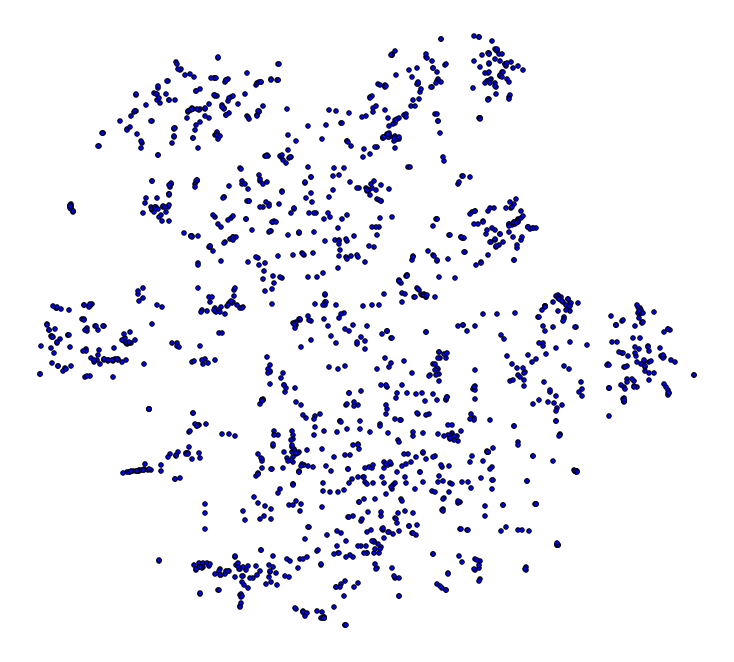

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(combo[:, 0], combo[:, 1])

In [16]:
%load_ext rpy2.ipython

In [17]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(vegan)
library(plyr); library(dplyr)
library(RColorBrewer)
library(stats)
library(reshape2)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: iterators

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: parallel

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: grid

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: permute



In [18]:
%Rpush combo

In [19]:
%%R
colnames(combo) = c("tsne_1", "tsne_2", "OTU")

In [20]:
%%R
combo = as.data.frame(combo)

In [21]:
%%R
head(combo)

          tsne_1         tsne_2        OTU
1   9.7914599201  22.8146435672 OTU.1     
2  9.99953513715  20.6541172476 OTU.2     
3 -7.59114896585  1.97562790011 OTU.3     
4  9.28888497676   22.531966426 OTU.4     
5  9.15525422952  20.2875483831 OTU.5     
6  -10.194380506 -7.25007631979 OTU.6     


In [22]:
%%R
combo$OTU = gsub(" ", "", combo$OTU, fixed = TRUE)

In [23]:
%%R
head(combo)

          tsne_1         tsne_2   OTU
1   9.7914599201  22.8146435672 OTU.1
2  9.99953513715  20.6541172476 OTU.2
3 -7.59114896585  1.97562790011 OTU.3
4  9.28888497676   22.531966426 OTU.4
5  9.15525422952  20.2875483831 OTU.5
6  -10.194380506 -7.25007631979 OTU.6


In [24]:
%%R
sample.md = read.table("data/Metadata_fungi.txt", 
                comment.char = "",
                header = TRUE,
                colClasses = c("Density" = "numeric"))
rownames(sample.md) = as.character(sample.md[, 1])

sample.md = sample_data(sample.md)

In [25]:
%%R
physeq = import_biom("data/otu_table_wtax.biom")
print(physeq)
sample.data = import_qiime_sample_data("data/Metadata_fungi.txt")
physeq = merge_phyloseq(physeq,sample.data)
print(physeq)
physeq.md = sample_data(physeq)
physeq.fungi = prune_samples((physeq.md$Treatment %in% c("12CCPS","13CCPS"))& 
                             (physeq.md$SampleID != c("D312.6")),  physeq)
physeq.fungi.prune = prune_samples(sample_sums(physeq.fungi) > 5360, physeq.fungi)
print (physeq.fungi.prune)
physeq.fungi.snorm = transform_sample_counts(physeq.fungi.prune, function(x) x/sum(x))
#physeq.fungi.thresh = filter_taxa(physeq.fungi.snorm, function(x) sum(x > 0) / length(x) > (0.25), TRUE)
#physeq.fungi.thresh.min = filter_taxa(physeq.fungi.thresh, function(x) sum(x) > 5000, TRUE)
#physeq.fungi.thresh = filter_taxa(physeq.SIP.snorm, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)
#print(physeq.fungi.thresh)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2032 taxa and 173 samples ]
tax_table()   Taxonomy Table:    [ 2032 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2032 taxa and 173 samples ]
sample_data() Sample Data:       [ 173 samples by 9 sample variables ]
tax_table()   Taxonomy Table:    [ 2032 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2032 taxa and 162 samples ]
sample_data() Sample Data:       [ 162 samples by 9 sample variables ]
tax_table()   Taxonomy Table:    [ 2032 taxa by 7 taxonomic ranks ]


In [26]:
%%R
mdf= tbl_df(psmelt(physeq.fungi.prune))

In [27]:
%%R
d = left_join(mdf, combo)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Joining by: "OTU"

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [28]:
%%R
d$Rank2 = gsub("p__", "", d$Rank2)
d$Rank3 = gsub("c__", "", d$Rank3)
d$Rank4 = gsub("o__", "", d$Rank4)

In [29]:
%%R
head(d)

Source: local data frame [6 x 21]

    OTU   Sample Abundance SampleID Primers       i2       i1 Day  Density
1 OTU.1  D1413.9     33528  D1413.9      30 cgtgagtg actcactg  14 1.735145
2 OTU.1 D1413.10     33074 D1413.10      31 ggatatct actcactg  14 1.729681
3 OTU.2 D3013.10     30125 D3013.10      91 tagcgagt tatagcga  30 1.731866
4 OTU.1 D1413.11     25235 D1413.11      32 gacaccgt actcactg  14 1.725310
5 OTU.1  D1413.6     23819  D1413.6      27 tagcgagt actcactg  14 1.751536
6 OTU.1 D3013.10     23256 D3013.10      91 tagcgagt tatagcga  30 1.731866
Variables not shown: Treatment (fctr), Mock_Comm (fctr), RNA_DNA (fctr), Rank1
  (fctr), Rank2 (chr), Rank3 (chr), Rank4 (chr), Rank5 (fctr), Rank6 (fctr),
  Rank7 (fctr), tsne_1 (fctr), tsne_2 (fctr)


In [30]:
%%R
d_sub = select(d, OTU, Sample, Day, tsne_1, tsne_2, Density, Rank1, Rank2, Rank3, Treatment)

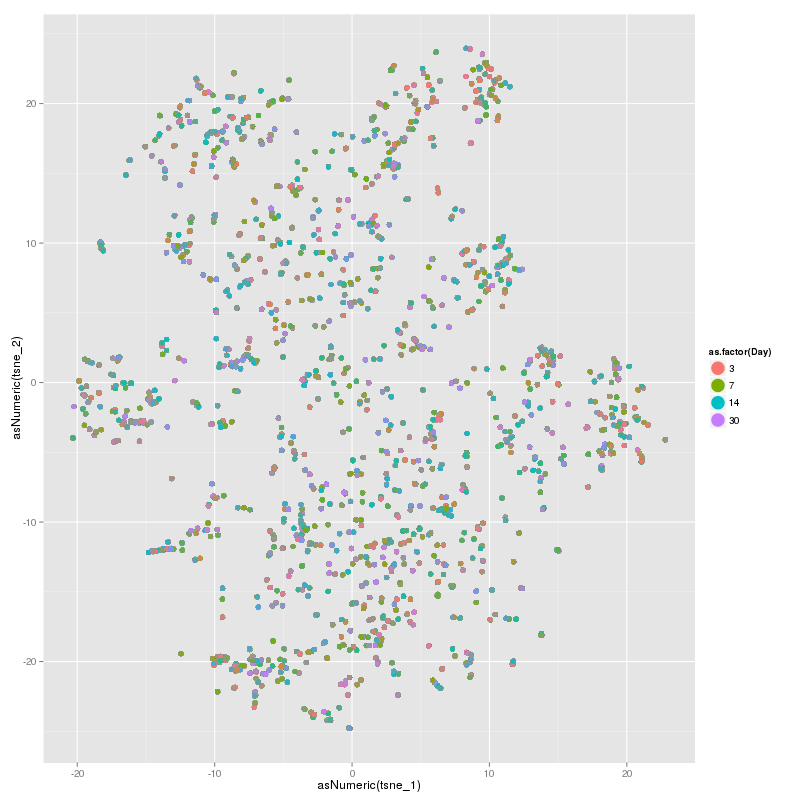

In [31]:
%%R -w 800 -h 800

asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d_sub, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = as.factor(Day), color = as.factor(Day), alpha = 0.85), pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))


p      

In [32]:
%%R
l2fc = read.csv("data/l2fc.csv", header = TRUE, sep = ",")

In [33]:
%%R
head(l2fc)

  Day    OTU log2FoldChange     lfcSE    Rank1      Rank2           Rank3
1   3 OTU.40     -1.7995959 0.3482440 k__Fungi Ascomycota Sordariomycetes
2   3  OTU.7      2.7460387 0.4049920 k__Fungi Ascomycota Sordariomycetes
3   3  OTU.5     -0.3195079 0.5060621 k__Fungi Ascomycota Sordariomycetes
4   3  OTU.3     -0.3862363 0.3147093 k__Fungi Ascomycota Sordariomycetes
5   3 OTU.16      0.4177197 0.2757979 k__Fungi Ascomycota            <NA>
6   3 OTU.11     -1.5514248 0.3555538 k__Fungi Ascomycota Sordariomycetes
           Rank4                   Rank5           Rank6
1    Hypocreales          f__Nectriaceae     g__Fusarium
2    Sordariales        f__Chaetomiaceae   g__Chaetomium
3    Sordariales        f__Chaetomiaceae     g__Humicola
4 Incertae_sedis f__Plectosphaerellaceae            <NA>
5           <NA>                    <NA>            <NA>
6 Incertae_sedis f__Plectosphaerellaceae g__Verticillium
                    Rank7 RNA_DNA  sparsity         p padj
1                    <NA

In [34]:
%%R
d2 = left_join(l2fc, d)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Joining by: c("Day", "OTU", "Rank1", "Rank2", "Rank3", "Rank4", "Rank5", "Rank6", "Rank7", "RNA_DNA")

  res = super(Function, self).__call__(*new_args, **new_kwargs)


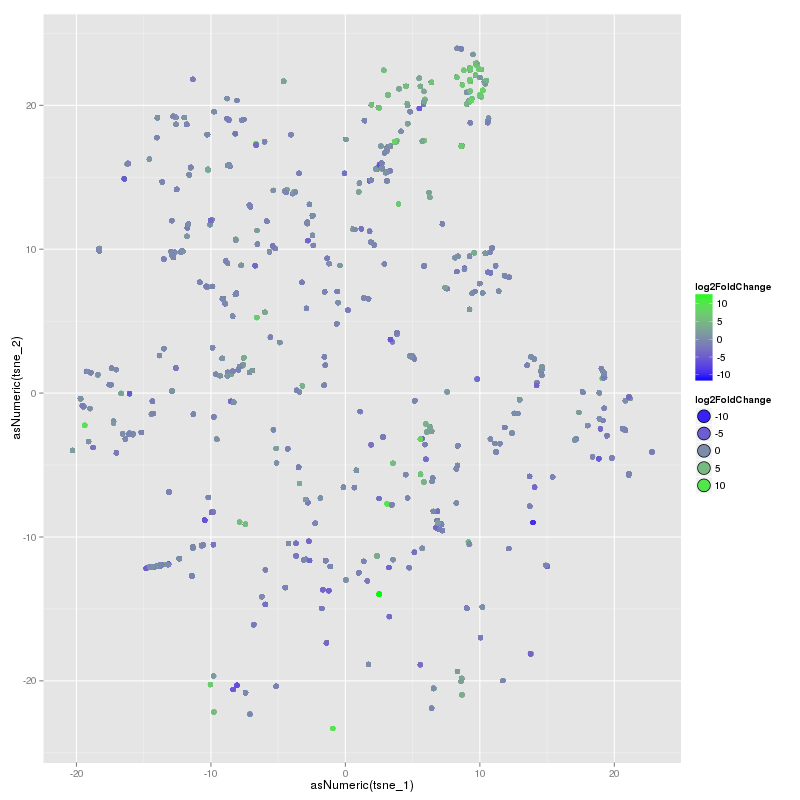

In [35]:
%%R -w 800 -h 800

my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d2, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = log2FoldChange, color = log2FoldChange, alpha = 0.85), pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density")+
    scale_fill_gradient(low="blue",high="green") + scale_colour_gradient(low="blue",high="green") 


p     

In [36]:
%%R
head(d2)
d2$logp = -log10(d2$padj)

In [107]:
%%R
d2$Resp_status[d2$padj > 0.10] = "Non-responder"
d2$Resp_status[d2$padj < 0.10] = "Responder"

In [108]:
%%R
head(d2$Resp_status)

[1] "Non-responder" "Non-responder" "Non-responder" "Non-responder"
[5] "Non-responder" "Non-responder"


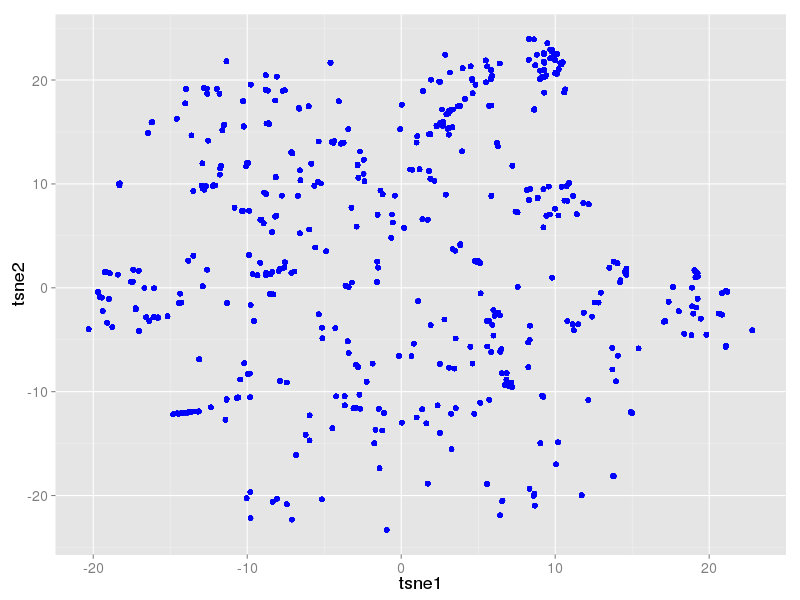

In [143]:
%%R -w 800 -h 600

my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d2, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(fill = "blue", color = "blue", size = 2, pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))  + 
    #scale_colour_gradient(limits = c(0, 1), low="red", high="blue", name = "Adjusted p-value") +
    guides(color=FALSE) + theme(text = element_text(size=18)) 


p = p + xlab("tsne1") + ylab("tsne2")


p   

In [144]:
%%R
ggsave("data/figs/tnseFig_nolabels.png", p, height = 7, width = 7)

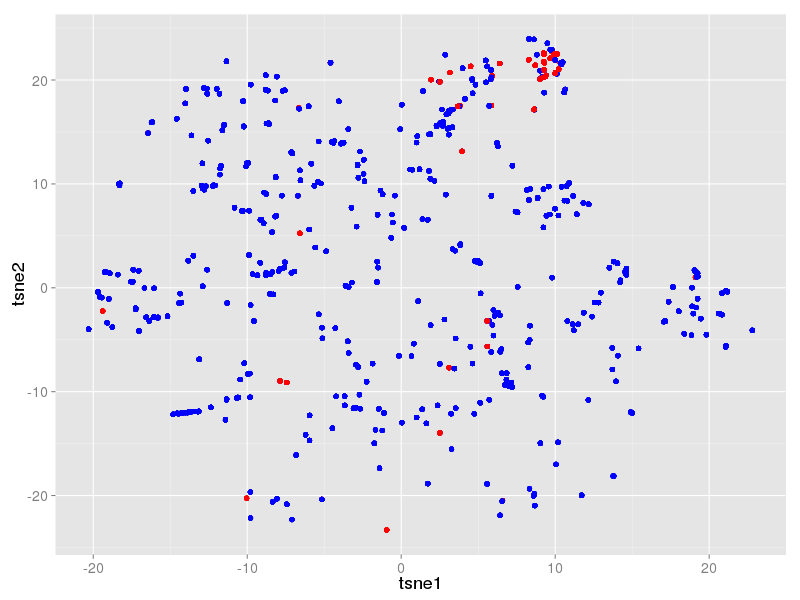

In [145]:
%%R -w 800 -h 600

my_palette <- c("blue", "red")


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d2, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = Resp_status, color = Resp_status, alpha = 0.85), size = 2, pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    #scale_fill_discrete(name = "Responder Status") + 
    scale_colour_manual(values = my_palette) +
    scale_fill_manual(values = my_palette, name = "Responder Status")+
    guides(color=FALSE, fill = FALSE) + theme(text = element_text(size=18)) 


p = p + xlab("tsne1") + ylab("tsne2")


p     

In [146]:
%%R
ggsave("data/figs/tnseFig.png", p, height = 7, width = 7)

In [39]:
%%R
d3 = d2 %>% group_by(tsne_1, tsne_2, padj, OTU) %>%
    summarise(LFC = mean(log2FoldChange))

In [40]:
%%R
head(d3)

Source: local data frame [6 x 5]
Groups: tsne_1, tsne_2, padj

           tsne_1         tsne_2      padj      OTU        LFC
1 0.0408281491729  17.6301414184 1.0000000 OTU.1569  1.4985427
2  0.043051441578 -12.9844884824 1.0000000 OTU.1035  0.4064679
3 -0.069262013811  15.2761256849 1.0000000 OTU.2744 -2.9443159
4 -0.145598775546 -6.54357366277 0.0396156  OTU.129  3.9611317
5 -0.145598775546 -6.54357366277 1.0000000  OTU.129 -0.7672712
6  0.189964393666  5.77035881853 1.0000000 OTU.1521 -0.8665389


In [41]:
%%R
points.dist = dist(cbind(d3$tsne_1, d3$tsne_2))
pval.dist = dist(d3$padj)

In [42]:
%%R
points2.dist = as.matrix(points.dist)
pval2.dist = as.matrix(pval.dist)

In [43]:
%%R
library(ape)

In [74]:
%%R
d2[is.na(d2)] = "unclassified"

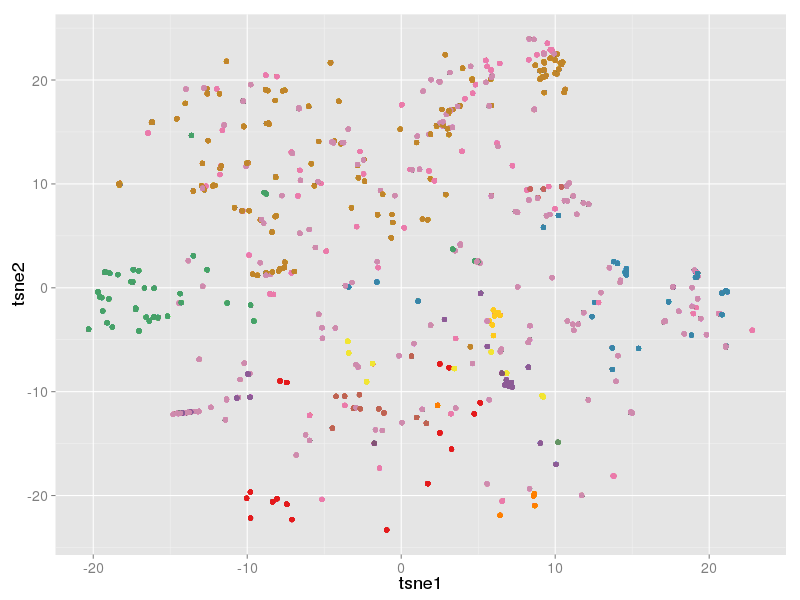

In [147]:
%%R -w 800 -h 600

#my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d2, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = Rank3, color = Rank3, alpha = 0.85), pch = 21, size = 2) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    #scale_fill_gradient(limits = c(0, 1), low="blue",high="green") + 
    #scale_colour_gradient(limits = c(0, 1), low="blue", high="green", name = "adjusted p-value") +
    guides(colour=FALSE)

colourCount = length(unique(d2$Rank3)) + 1
getPalette = colorRampPalette(brewer.pal(10, "Set1"))
p = p + scale_color_manual(values = getPalette(colourCount))
p = p + scale_fill_manual(values = getPalette(colourCount), name = "Class")+ theme(text = element_text(size=18)) 

#p = p  + geom_point(data = subset(d2, Rank3 %in% c('unclassified', 'unidentified')), color = "black", size = 2)


#p = p + geom_point(data = subset(d2, padj <= 0.10), shape = 8)


p = p + xlab("tsne1") + ylab("tsne2") +  guides(color=FALSE, fill = FALSE) 


p     

In [148]:
%%R
ggsave("data/figs/tnseFig_annotated.png", p, height = 7, width = 7)

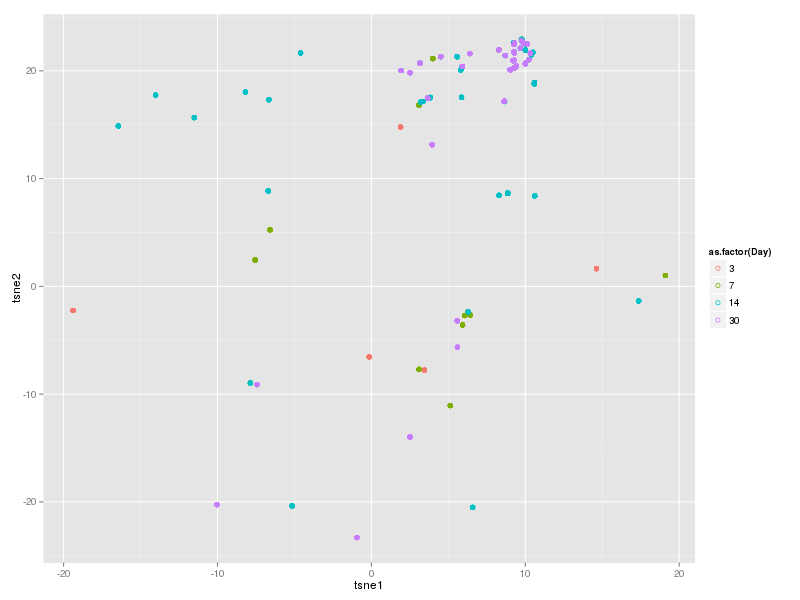

In [44]:
%%R -w 800 -h 600
resp = filter(d2, padj <= 0.10)

asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(resp, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = as.factor(Day), color = as.factor(Day), alpha = 0.85), pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    #scale_fill_gradient(limits = c(0, 1), low="blue",high="green") + 
    #scale_colour_gradient(limits = c(0, 1), low="blue", high="green", name = "adjusted p-value") +
    guides(fill=FALSE)

p = p + xlab("tsne1") + ylab("tsne2")


p     


In [198]:
%%R
ggsave("data/figs/tnseFig.jpg", p, height = 5, width = 7)

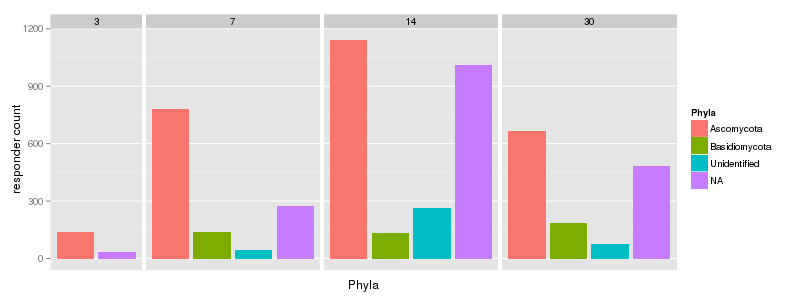

In [45]:
%%R -w 800 -h 300

dcounts = d2 %>%
          group_by(Day,Rank2) %>%
          summarize(responders = sum(padj<= 0.10)) 

dcounts = filter(dcounts, responders !=0)          
dcounts$Rank2[is.na(dcounts$Rank2)] = "p__unidentified"

p2 = ggplot(dcounts, aes(x = Rank2 , y = responders, fill = Rank2)) +
    facet_grid(. ~ Day, scales = "free_x", space = "free") +
    geom_bar(stat = "identity") +
    xlab("Phyla") + ylab("responder count") +
    scale_x_discrete(breaks=NULL) +
    scale_fill_discrete(name = "Phyla", labels = c("Ascomycota", "Basidiomycota", "Unidentified"))
                        

p2

In [228]:
%%R
ggsave("data/figs/responderCounts.jpg", p2, height = 3, width = 8)

In [209]:
%%R
tail(filter(d2, Rank2 == "p__unidentified"))

      Day      OTU log2FoldChange    lfcSE    Rank1           Rank2
27179  30 OTU.1661       7.241660 1.554636 k__Fungi p__unidentified
27180  30 OTU.1661       7.241660 1.554636 k__Fungi p__unidentified
27181  30 OTU.1661       7.241660 1.554636 k__Fungi p__unidentified
27182  30 OTU.1661       7.241660 1.554636 k__Fungi p__unidentified
27183  30 OTU.1661       7.241660 1.554636 k__Fungi p__unidentified
27184  30 OTU.2731       8.030272 1.519169 k__Fungi p__unidentified
                Rank3           Rank4           Rank5           Rank6 Rank7
27179 c__unidentified o__unidentified f__unidentified g__unidentified  <NA>
27180 c__unidentified o__unidentified f__unidentified g__unidentified  <NA>
27181 c__unidentified o__unidentified f__unidentified g__unidentified  <NA>
27182 c__unidentified o__unidentified f__unidentified g__unidentified  <NA>
27183 c__unidentified o__unidentified f__unidentified g__unidentified  <NA>
27184 c__unidentified o__unidentified f__unidentified g__unidentifie

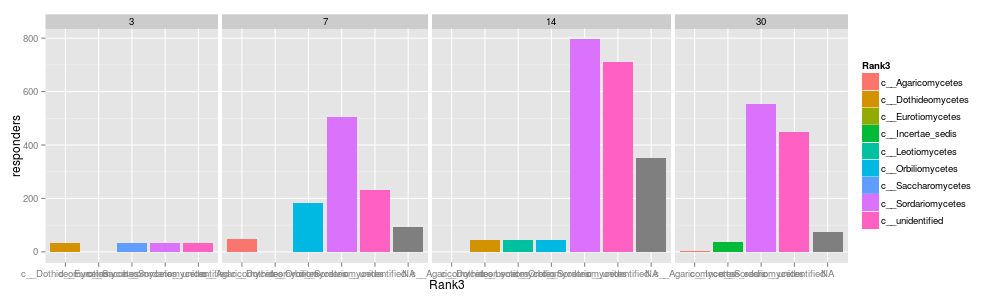

In [186]:
%%R -w 1000 -h 300

dcounts = d2 %>%
          group_by(Day,Rank3) %>%
          summarize(responders = sum(padj<= 0.10)) 

dcounts = filter(dcounts, responders !=0)          


p = ggplot(dcounts, aes(x = Rank3 , y = responders, fill = Rank3)) +
    facet_grid(. ~ Day, scales = "free_x", space = "free") +
    geom_bar(stat = "identity")

p

In [173]:
%%R
head(dcounts)

Source: local data frame [6 x 3]
Groups: Day

  Day                Rank4 responders
1   3        o__Eurotiales          1
2   3      o__Pleosporales         35
3   3 o__Saccharomycetales         35
4   3       o__Sordariales         35
5   3      o__unidentified         35
6   7    o__Cantharellales          1


In [88]:
%%R
d3 = filter(d2, padj <=0.10)
d3$tsne_1 = asNumeric(d3$tsne_1)
d3$tsne_2 = asNumeric(d3$tsne_2)
d3 = filter(d3, tsne_1 > 19)
d3 = filter(d3, tsne_2 > 7)
d3 = filter(d3, tsne_2 <13)

In [89]:
%%R
length(d3$OTU)

[1] 2084


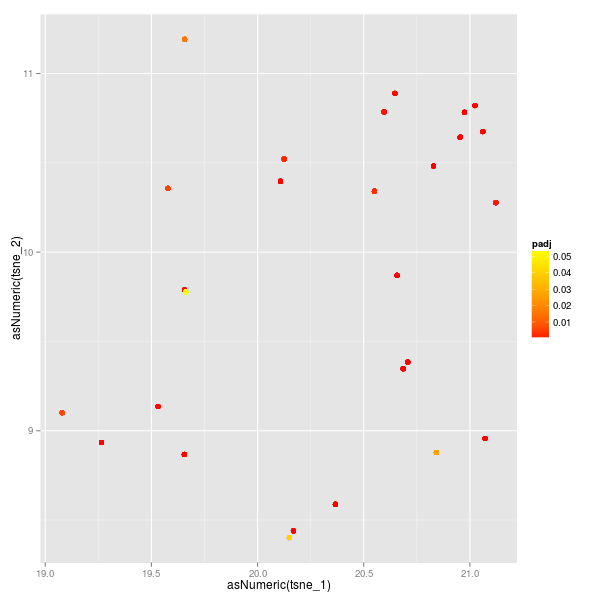

In [179]:
%%R -w 600 -h 600

my_palette <- colorRampPalette(c("red", "yellow", "green"))(n =299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d3, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = padj, color = padj, alpha = 0.85), pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    scale_fill_gradient(low="red",high="yellow") + scale_colour_gradient(low="red",high="yellow") +
    guides(fill=FALSE)


p     

In [103]:
%%R
OTUs = d3$OTU 

In [104]:
%%R
counts = filter(d, OTU %in% OTUs)

In [131]:
%%R
head(dcounts)

Error in layout_base(data, cols, drop = drop) : 
  At least one layer must contain all variables used for facetting
Source: local data frame [4 x 2]

            Rank6 rank
1   g__Chaetomium  664
2     g__Humicola  249
3 g__unidentified  418
4              NA  753


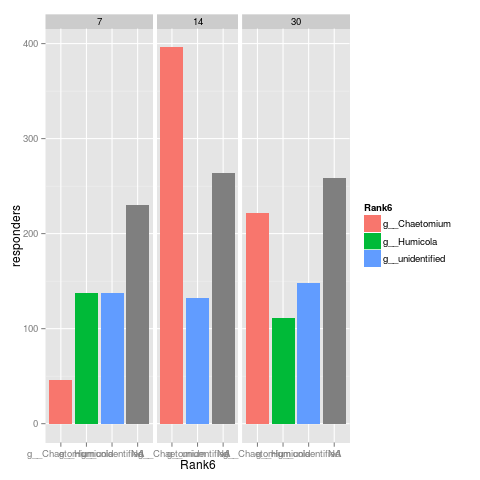

In [157]:
%%R

dcounts = d3 %>%
          group_by(Day,Rank6) %>%
          summarize(responders = sum(padj<= 0.10))

p = ggplot(dcounts, aes(x = Rank6 , y = responders, fill = Rank6)) +
    facet_grid(. ~ Day, scales = "free_x", space = "free") +
    geom_bar(stat = "identity")


#px = ggplot(d, aes(x = factor(Day), y = responders, fill = RNA_DNA))

#px = px + facet_grid(. ~ Day, scales = "free_x", space = "free")

#px = px + geom_bar(stat = "identity", position = "dodge")

    #geom_point(aes(fill = padj, color = padj, alpha = 0.85), pch = 21) +
    #uides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    #scale_fill_gradient(low="red",high="yellow") + scale_colour_gradient(low="red",high="yellow") +
    #guides(fill=FALSE)
p

In [95]:
%%R
head(d3)

  Day       OTU log2FoldChange     lfcSE    Rank1         Rank2
1   7 OTU.17693       5.914121 0.8683596 k__Fungi p__Ascomycota
2   7 OTU.17693       5.914121 0.8683596 k__Fungi p__Ascomycota
3   7 OTU.17693       5.914121 0.8683596 k__Fungi p__Ascomycota
4   7 OTU.17693       5.914121 0.8683596 k__Fungi p__Ascomycota
5   7 OTU.17693       5.914121 0.8683596 k__Fungi p__Ascomycota
6   7 OTU.17693       5.914121 0.8683596 k__Fungi p__Ascomycota
               Rank3          Rank4            Rank5       Rank6 Rank7 RNA_DNA
1 c__Sordariomycetes o__Sordariales f__Chaetomiaceae g__Humicola  <NA>     DNA
2 c__Sordariomycetes o__Sordariales f__Chaetomiaceae g__Humicola  <NA>     DNA
3 c__Sordariomycetes o__Sordariales f__Chaetomiaceae g__Humicola  <NA>     DNA
4 c__Sordariomycetes o__Sordariales f__Chaetomiaceae g__Humicola  <NA>     DNA
5 c__Sordariomycetes o__Sordariales f__Chaetomiaceae g__Humicola  <NA>     DNA
6 c__Sordariomycetes o__Sordariales f__Chaetomiaceae g__Humicola  <NA>     DNA

###Blasting vs. Living Tree Project for Responders

In [231]:
%%R
resp = filter(d2, padj<=0.10)

In [240]:
%%R
q = arrange(resp, padj)
OTU = unique(q$OTU)
length(OTU)

[1] 92


In [248]:
%%R
head(OTU, n = 10)

 [1] "OTU.98"   "OTU.49"   "OTU.53"   "OTU.90"   "OTU.279"  "OTU.6893"
 [7] "OTU.460"  "OTU.365"  "OTU.5490" "OTU.304" 


In [241]:
from Bio.Blast.Applications import NcbiblastnCommandline as blast

In [243]:
from cogent import LoadSeqs, DNA

In [276]:
%%bash
formatdb -i /home/chantal/FungalSIP/data/tmp/db/its_12_11_otus/rep_set/97_otus.fasta -p F

In [277]:
OTU_ids = ["OTU.98", "OTU.49", "OTU.53", "OTU.90", "OTU.279", "OTU.6893", "OTU.460", "OTU.6893"]
seqs = LoadSeqs("/home/chantal/FungalSIP/data/otusn.fasta", moltype=DNA, aligned=False)
seqs = seqs.takeSeqs(OTU_ids).toFasta()
print seqs

>OTU.279
TTACCGAGTTTACAACTCCCAAACCCAATGTGAACCATACCTAGACGTTGCTTCGGCGGTACCGCCCCGGCGCCCTCGGGCCCGGAACCAGGCGCCCGCCGGGGGACCAACCAAACCCTTTCAGTGAATCCCGGGCGACCCCCGGCGGCATTATCTGAGTACAGCGAAATAAAAAACGCATCAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>OTU.460
TTACAGAGTTGCAAAACTCCCTAAACCATTGTGAACGTTACCTAAACCGTTGCTTCGGCGGGCGGCCCCGGGGTTTACCCCCCGGGCGCCCCTGGGCCCCACCGCGGGCGCCCGCCGGAGGTCACCAAACTCTTGAATTACATGGCCTCTCTGAGTCTTCTGTACTGAATAAGTCAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>OTU.49
TTACAGAGTTGCAAAACTCCCTAAACCATTGTGAACCTTACCCAAACCGTTGCTTCGGCGGGCGGCGCACCGCGCCCCCCGGCCCCTCGCGGGCGCCCGCCGGAGGTACCCAAACCATTGATACTTTATGGCCTCTCTGAGTCTTCTGTACTGAATAAGTCAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>OTU.53
TTACCGAGTGTAAAAACTCCCAAACCATTGTGAACCTACCACTGTTGCTTCGGCGGCCTCGCCCCGGGCGCGTTCGCGCGGCCCGGACCCAGGCGTCCGCCGGAGGCTCCAAACTCTTGTCTTTTAGTGTATTTCTGAGTGGCATAAGCAAATAAATCAAAACTTTCAGCAACGGATCTCTTGGTTCTGGC
>OTU.6893
TTACAGAGTTGCAACACTCCCTTAACCATCGTGAACGTTACCCAAACCGTTGCTTCGGCGGGCGGCGCCCCGGCGCCCCCCGGCCCCTCGCGGGCGCCCGCCGGAGGTACCCAAACCATTGATACTTTATGGCCTCTCTGAGTC

In [251]:
my_file = open("seqs.fasta", "w")
my_file.write(seqs)
my_file.close()

In [286]:
cline = blast(query = "seqs.fasta",
              db = "/home/chantal/FungalSIP/data/tmp/db/its_12_11_otus/rep_set/97_otus.fasta",
              outfmt = 6,
              out = "otusn_silvaRefNR115.m6",
              num_threads = 5)
print cline
cline()

blastn -out otusn_silvaRefNR115.m6 -outfmt 6 -query seqs.fasta -db /home/chantal/FungalSIP/data/tmp/db/its_12_11_otus/rep_set/97_otus.fasta -num_threads 5


('', '')

In [292]:
!head -n1 otusn_silvaRefNR115.m6
!wc -l otusn_silvaRefNR115.m6
! grep -c "OTU.279" otusn_silvaRefNR115.m6

OTU.279	GQ169328	98.15	216	2	2	1	215	66	280	4e-104	  375
4030 otusn_silvaRefNR115.m6
613


In [288]:
from IPython.display import Image
import pandas.rpy.common as com

In [289]:
%%R
library(data.table)
library(dplyr)

In [300]:
%%R
blastout_dt = fread("otusn_silvaRefNR115.m6")
blastout_df = tbl_df(blastout_dt)
colnames(blastout_df) = c("OTU",
                        "acc",
                        "pid",
                        "aln.length",
                        "mismatches",
                        "gapOpenCount",
                        "qstart",
                        "qend",
                        "sstart",
                        "send",
                        "e.value",
                        "bit.score")

top_hits_df_LTP = blastout_df %>% 
                          group_by(OTU) %>% 
                          mutate(Rank = rank(desc(bit.score), ties.method = "min")) #%>% 
                          #filter(pid > 97.0) %>%
                          #filter(e.value < 5.0e-180) %>%
                          #filter(acc %in% c('AM286414', 'AB428568', 'EU877263', 'EF575565', 'EF494193', 'X82449'))

In [301]:
%%R
print(head(top_hits_df_LTP))
str(top_hits_df_LTP$OTU)

Source: local data frame [6 x 13]
Groups: OTU

      OTU      acc   pid aln.length mismatches gapOpenCount qstart qend sstart
1 OTU.279 GQ169328 98.15        216          2            2      1  215     66
2 OTU.279 AF422973 95.79        214          5            4      4  215     36
3 OTU.279 AJ246149 95.35        215          6            3      1  215    108
4 OTU.279 FN392297 95.35        215          6            3      1  215      6
5 OTU.279 DQ865099 86.82        220         10           12      1  215     21
6 OTU.279 JN905732 82.11        218         12           15      1  215     66
Variables not shown: send (int), e.value (dbl), bit.score (dbl), Rank (int)
 chr [1:4030] "OTU.279" "OTU.279" "OTU.279" "OTU.279" "OTU.279" ...


In [308]:
! head data/tmp/db/its_12_11_otus/taxonomy/otu_taxonomy.txt

DQ068970	k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Thelephorales;f__Thelephoraceae;g__Thelephora;s__Thelephora_terrestris
AY750163	k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Thelephorales;f__Thelephoraceae;g__Thelephora;s__Thelephora_terrestris
AY456369	k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Thelephorales;f__Thelephoraceae;g__Thelephora;s__Thelephora_terrestris
AY880934	k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Thelephorales;f__Thelephoraceae;g__Thelephora;s__Thelephora_terrestris
AY880929	k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Thelephorales;f__Thelephoraceae;g__Tomentella;s__Tomentella_sublilacina
AF104990	k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Thelephorales;f__Thelephoraceae;g__Tomentella;s__Tomentella_testaceogilva
AF104989	k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Thelephorales;f__Thelephoraceae;g__Thelephora;s__Thelephora_alnii
AF104988	k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Thelephorales;f__Thelephoraceae;g__Tomentella;s__Tomente

In [354]:
%%R
dt = fread("data/tmp/db/its_12_11_otus/taxonomy/97_otu_taxonomy.txt", sep = ";", header = FALSE)
dat1 <- data.frame(do.call(rbind, strsplit(as.vector(dt$V1), split = "\t")))
dt <- cbind(dat1, dt)
dt$V1 = NULL
colnames(dt) = c("acc","Kingdom","Phylum","Class","Order","Family","Genus", "Species")
ITS_seq_data = tbl_df(dt)
head(dt)

       acc  Kingdom           Phylum             Class            Order
1 AJ633596 k__Fungi p__Basidiomycota c__Agaricomycetes o__Thelephorales
2 DQ482002 k__Fungi p__Basidiomycota c__Agaricomycetes o__Thelephorales
3 DQ377423 k__Fungi p__Basidiomycota c__Agaricomycetes o__Thelephorales
4 AM901882 k__Fungi p__Basidiomycota c__Agaricomycetes o__Thelephorales
5 FJ008041 k__Fungi p__Basidiomycota c__Agaricomycetes o__Thelephorales
6 FJ816770 k__Fungi p__Basidiomycota c__Agaricomycetes o__Thelephorales
             Family         Genus                             Species
1 f__Thelephoraceae g__Thelephora s__unculturedectomycorrhizal_fungus
2 f__Thelephoraceae g__Tomentella           s__Tomentella_sublilacina
3 f__Thelephoraceae g__Tomentella           s__Tomentella_sublilacina
4 f__Thelephoraceae g__Thelephora            s__Thelephora_terrestris
5 f__Thelephoraceae g__Thelephora            s__Thelephora_terrestris
6 f__Thelephoraceae g__Tomentella           s__Tomentella_sublilacina


In [355]:
%%R
joined_df = left_join(top_hits_df_LTP, ITS_seq_data)

Joining by: "acc"


In [357]:
%%R
head(joined_df)

Source: local data frame [6 x 20]
Groups: OTU

      OTU      acc   pid aln.length mismatches gapOpenCount qstart qend sstart
1 OTU.279 GQ169328 98.15        216          2            2      1  215     66
2 OTU.279 AF422973 95.79        214          5            4      4  215     36
3 OTU.279 AJ246149 95.35        215          6            3      1  215    108
4 OTU.279 FN392297 95.35        215          6            3      1  215      6
5 OTU.279 DQ865099 86.82        220         10           12      1  215     21
6 OTU.279 JN905732 82.11        218         12           15      1  215     66
Variables not shown: send (int), e.value (dbl), bit.score (dbl), Rank (int),
  Kingdom (fctr), Phylum (chr), Class (chr), Order (chr), Family (chr), Genus
  (chr), Species (chr)


In [356]:
%%R
joined_df = filter(joined_df, name != "NA")

Error in filter_impl(.data, dots) : object 'name' not found
In addition: Warning message:
joining factor and character vector, coercing into character vector
Error in filter_impl(.data, dots) : object 'name' not found


In [358]:
%%R
dim(joined_df)

[1] 4030   20


In [369]:
%%R
head(joined_df)

Source: local data frame [6 x 20]
Groups: OTU

      OTU      acc   pid aln.length mismatches gapOpenCount qstart qend sstart
1 OTU.279 GQ169328 98.15        216          2            2      1  215     66
2 OTU.279 AF422973 95.79        214          5            4      4  215     36
3 OTU.279 AJ246149 95.35        215          6            3      1  215    108
4 OTU.279 FN392297 95.35        215          6            3      1  215      6
5 OTU.279 DQ865099 86.82        220         10           12      1  215     21
6 OTU.279 JN905732 82.11        218         12           15      1  215     66
Variables not shown: send (int), e.value (dbl), bit.score (dbl), Rank (int),
  Kingdom (fctr), Phylum (chr), Class (chr), Order (chr), Family (chr), Genus
  (chr), Species (chr)


In [359]:
df = com.load_data("joined_df")

In [364]:
def get_latex(df):
    latex = ""
    prefix = r"\multirow{%s}{*}{%s}"%(len(df.index), df.OTU.iloc[0])
    for i, r in df[["Genus", "Species","pid","acc"]].iterrows():
        latex += " & " + " & ".join([str(i) for i in r.values]) + r" \\ "
    return prefix + latex + r"\midrule" + "\n"

In [365]:
s = df.groupby("OTU").apply(get_latex)

table_framework = r"""
\documentclass[11pt]{article}
\usepackage{multirow, array, booktabs}
\begin{document}

\thispagestyle{empty}
 
\begin{table}[ht]
\caption{$^{13}$C RNA responders BLAST against Living Tree Project}
\begin{center}
\begin{tabular}{l>{\itshape}lrl}
    \toprule \\
    \textbf{OTU ID} & \textbf{Species Name} & \textbf{BLAST percent identity} & \textbf{accession} \\
    \midrule
    %s
    \bottomrule
\end{tabular}
\end{center}
\label{tab:multicol}
\end{table}
 
\end{document}"""%"".join(s.values)

with open("data/table.tex", "w") as out:
    out.write(table_framework)

In [366]:
!latex -output-directory="data/tmp" data/tmp/table.tex >/dev/null 2>&1 && \
dvipng -o data/table.png data/tmp/table.dvi >/dev/null 2>&1
Image("data/table.png")

^C
